## Data Visualizations with Matplotlib
* [Simple Visualizations](#simple)
* [Time-Series](#time-series)
* [Quantitative Comparisons and Statistical Visualizations](#quant)
* [Sharing Visualizations](#share)

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

## Simple Visualizations <a class="anchor" id="simple"/>
**How to create subplots**

```
fig, ax = plt.subplots()
```

where "ax" is the main part that creates subplots, whereas "fig" is responsible for the overall figure (create the main title). 

In [2]:
# read seattle.csv 
seattle_weather = pd.read_csv('datasets/seattle_weather.csv')

# check contents
print(f'Rows: {seattle_weather.shape[0]}, Columns: {seattle_weather.shape[1]}')
seattle_weather.head(2)

Rows: 204, Columns: 80


,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USC00456295,"PALMER 3 ESE, WA US",1,13.0,1.0,-7777.0,0.0,0.0,0.0,0.0,...,310.0,310.0,34.0,168.0,327.0,615.0,877.0,987.0,1000.0,2.8
1,USC00456295,"PALMER 3 ESE, WA US",2,23.0,3.0,-7777.0,-7777.0,0.0,0.0,0.0,...,280.0,280.0,33.9,132.0,275.0,515.0,800.0,963.0,1000.0,3.1


In [3]:
# create months
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# get the average temperature and store new results
seattle_monthly = seattle_weather.groupby('DATE').aggregate('mean')

In [4]:
# read austin.csv 
austin_weather = pd.read_csv('datasets/austin_weather.csv')

# check contents
print(f'Rows: {austin_weather.shape[0]}, Columns: {austin_weather.shape[1]}')
austin_weather.head(2)

Rows: 12, Columns: 67


,STATION,NAME,DATE,MLY-CLDD-BASE45,MLY-CLDD-BASE50,MLY-CLDD-BASE55,MLY-CLDD-BASE57,MLY-CLDD-BASE60,MLY-CLDD-BASE70,MLY-CLDD-BASE72,...,MLY-TMIN-AVGNDS-LSTH060,MLY-TMIN-AVGNDS-LSTH070,MLY-TMIN-NORMAL,MLY-TMIN-PRBOCC-LSTH016,MLY-TMIN-PRBOCC-LSTH020,MLY-TMIN-PRBOCC-LSTH024,MLY-TMIN-PRBOCC-LSTH028,MLY-TMIN-PRBOCC-LSTH032,MLY-TMIN-PRBOCC-LSTH036,MLY-TMIN-STDDEV
0,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",1,190,103,50,35,18,1,-7777,...,302,310,36.3,298,570,839,967,997,1000,2.9
1,USW00013904,"AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US",2,228,132,68,49,29,3,1,...,264,280,39.4,103,327,614,867,973,999,3.2


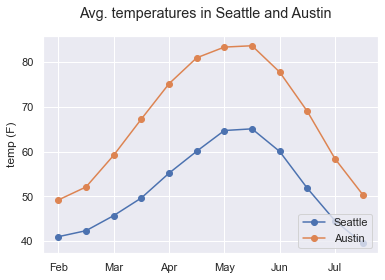

In [5]:
# get average temperatures
austin_avg = austin_weather['MLY-TAVG-NORMAL']
seattle_avg = seattle_monthly['MLY-TAVG-NORMAL']

# create a subplot
fig, ax = plt.subplots()
# set title
fig.suptitle('Avg. temperatures in Seattle and Austin')
# plot avg temps for Austin and Seattle
ax.plot(np.arange(len(MONTHS)), seattle_avg, marker='o')
ax.plot(np.arange(len(MONTHS)), austin_avg, marker='o')
# change months layout
ax.set_xticklabels(MONTHS)

# set labels and legends
ax.set_ylabel('temp (F)')
plt.legend(['Seattle', 'Austin'], loc=4)
plt.show()

#### Adding more data

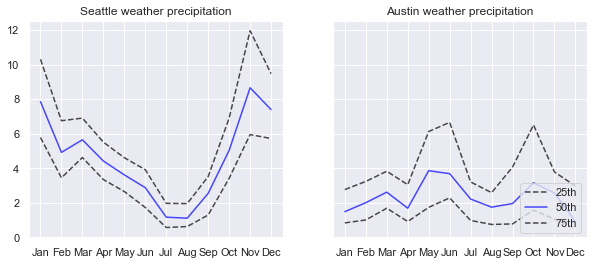

In [6]:
# plot differences in precipitation
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# plot Seattle's precipitation
ax[0].plot(MONTHS, seattle_monthly['MLY-PRCP-25PCTL'], linestyle='--', color='black', alpha=0.7)
ax[0].plot(MONTHS, seattle_monthly['MLY-PRCP-50PCTL'], linestyle='-', color='blue', alpha=0.7)
ax[0].plot(MONTHS, seattle_monthly['MLY-PRCP-75PCTL'], linestyle='--', color='black', alpha=0.7)

# plot Austin's precipitation
ax[1].plot(MONTHS, austin_weather['MLY-PRCP-25PCTL'], linestyle='--', color='black', alpha=0.7)
ax[1].plot(MONTHS, austin_weather['MLY-PRCP-50PCTL'], linestyle='-', color='blue', alpha=0.7)
ax[1].plot(MONTHS, austin_weather['MLY-PRCP-75PCTL'], linestyle='--', color='black', alpha=0.7)

# set titles and legends
ax[0].set_title('Seattle weather precipitation')
ax[1].set_title('Austin weather precipitation')
plt.legend(['25th', '50th', '75th'], loc=4)
plt.show()

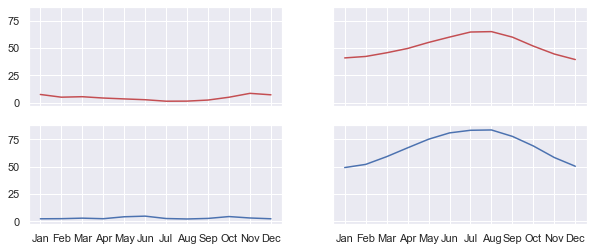

In [7]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(10, 4), sharex=True, sharey=True)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(MONTHS, seattle_monthly['MLY-PRCP-NORMAL'], color='r')

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(MONTHS, seattle_monthly['MLY-TAVG-NORMAL'], color='r')

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1, 0].plot(MONTHS, austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1, 1].plot(MONTHS, austin_weather['MLY-TAVG-NORMAL'])

plt.show()

## Time-Series <a class="anchor" id="time-series"/>

**Plotting time-series data**

In [8]:
climate_change = pd.read_csv('datasets/climate_change.csv', parse_dates=['date'], dayfirst=True, index_col='date')
print(climate_change.dtypes)

# check contents
print(f'Rows: {climate_change.shape[0]}, Columns: {climate_change.shape[1]}')
climate_change.head(2)

co2              float64
relative_temp    float64
dtype: object
Rows: 706, Columns: 2


,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01


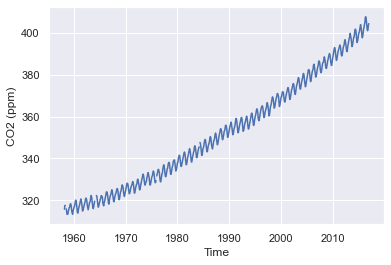

In [9]:
# show all dates
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change['co2'])
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
plt.show()

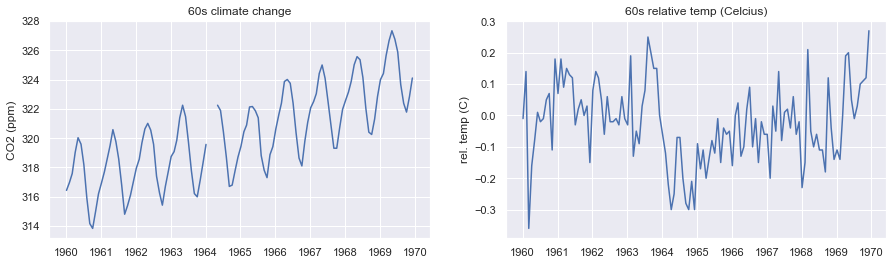

In [10]:
# show a decade
sixties = climate_change["1960-01-01":"1969-12-31"]
fig, ax = plt.subplots(1, 2, figsize=(15, 4), sharex=True)
ax[0].set_title('60s climate change')
ax[0].plot(sixties.index, sixties.co2)
ax[0].set_ylabel('CO2 (ppm)')

ax[1].set_title('60s relative temp (Celcius)')
ax[1].plot(sixties.index, sixties.relative_temp)
ax[1].set_ylabel('rel. temp (C)')

plt.show()

#### Plotting two time-series with different variables
**Idea**:
```
fig, ax = plt.subplots()
ax.plot(..., ...)
.
.
.
ax2 = ax.twinx()   -> share x-axis but different y
ax2.plot(..., ...)
```

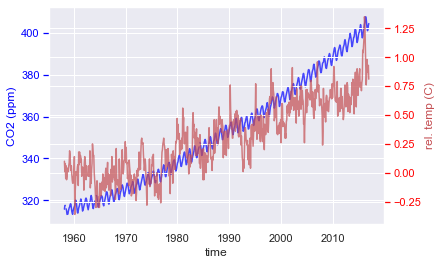

In [11]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change.co2, color='blue', alpha=0.7)
ax.set_xlabel('time')
ax.set_ylabel('CO2 (ppm)', color='blue')
ax.tick_params('y', colors='blue')

ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change.relative_temp, color='r', alpha=0.7)
ax2.set_ylabel('rel. temp (C)', color='r')
ax2.tick_params('y', colors='red')
plt.show()

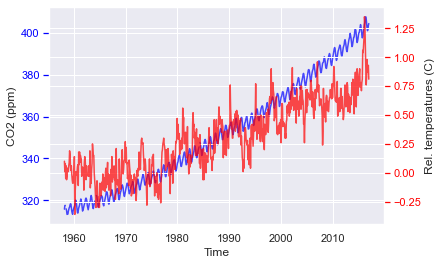

In [12]:
# define functions

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color, alpha=0.7)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.tick_params('y', colors=color)
    

# better representations
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change.co2, 
                'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change.relative_temp, 
                'red', 'Time', 'Rel. temperatures (C)')

#### Annotating time-series data

Text(2008-10-06 00:00:00, -0.2, '> 1 degree')

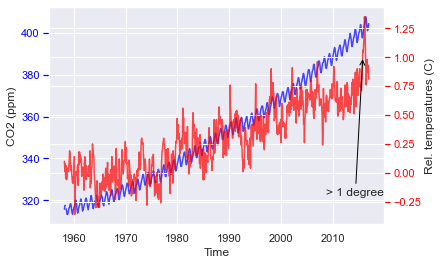

In [13]:
# better representations
fig, ax = plt.subplots()
plot_timeseries(ax, climate_change.index, climate_change.co2, 
                'blue', 'Time', 'CO2 (ppm)')
ax2 = ax.twinx()
plot_timeseries(ax2, climate_change.index, climate_change.relative_temp, 
                'red', 'Time', 'Rel. temperatures (C)')
# annotate
ax2.annotate('> 1 degree', xy=[pd.Timestamp('2015-10-06'), 1],
            xytext=(pd.Timestamp('2008-10-06'), -0.2),
            arrowprops={'arrowstyle': '->', 'color': 'black'})

## Quantitative Comparisons and Statistical Visualizations <a class="anchor" id="quant"/>
* Ticks rotation
* Stacked barchart

In [14]:
olympic_medals = pd.read_csv('datasets/medals_by_country_2016.csv', index_col=0)
olympic_medals.head(3)

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55


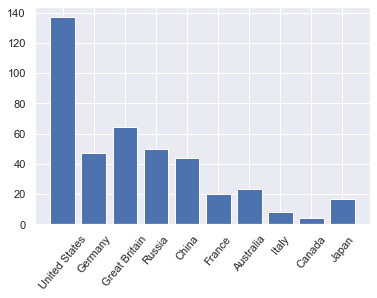

In [15]:
# tick rotation
fig, ax = plt.subplots()
ax.bar(olympic_medals.index, olympic_medals['Gold'])
ax.set_xticklabels(olympic_medals.index, rotation=50)
plt.show()

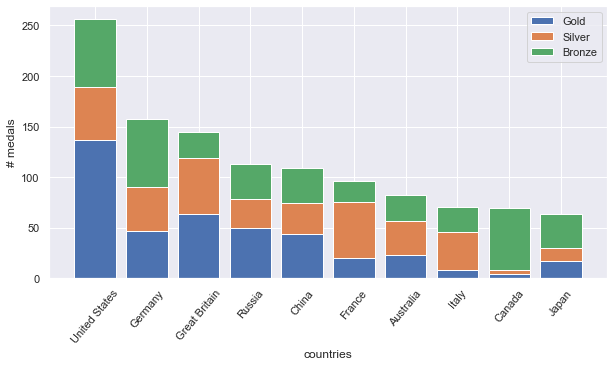

In [16]:
# stacked barchart 
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(olympic_medals.index, olympic_medals['Gold'])
ax.bar(olympic_medals.index, olympic_medals['Silver'], bottom=olympic_medals['Gold'])
ax.bar(olympic_medals.index, olympic_medals['Bronze'], bottom=olympic_medals['Gold'] + olympic_medals['Silver'])
ax.set_xticklabels(olympic_medals.index, rotation=50)
ax.set_ylabel('# medals')
ax.set_xlabel('countries')
ax.legend(['Gold', 'Silver', 'Bronze'], loc=1)
plt.show()

In [17]:
# histograms 
athletes = pd.read_csv('datasets/summer2016.csv', index_col=0)
athletes.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver


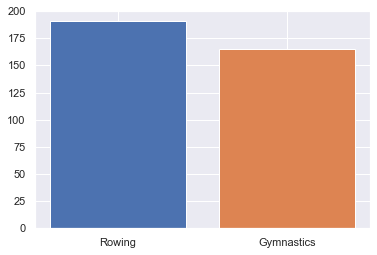

In [18]:
# check the men's heights distribution
men_rowing = athletes[(athletes['Sex'] == 'M') & (athletes['Sport'] == 'Rowing')]
men_gymnastics = athletes[(athletes['Sex'] == 'M') & (athletes['Sport'] == 'Gymnastics')]

# one option with barplots
fig, ax = plt.subplots()
ax.bar('Rowing', men_rowing['Height'].mean())
ax.bar('Gymnastics', men_gymnastics['Height'].mean())
plt.show()

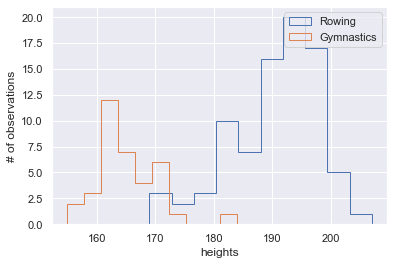

In [19]:
# second option with histograms
fig, ax = plt.subplots()
ax.hist(men_rowing['Height'], label='Rowing', histtype='step')
ax.hist(men_gymnastics['Height'], label='Gymnastics', histtype='step')
ax.set_xlabel('heights')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

**Statistical Plotting**: Barplots, Histograms, Line plots


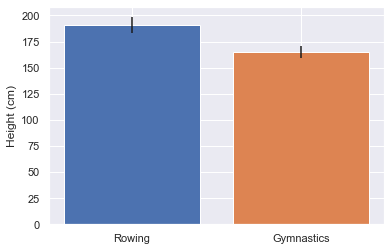

In [20]:
# adding error bars to bar charts 
fig, ax = plt.subplots()
ax.bar('Rowing', men_rowing['Height'].mean(), yerr=men_rowing['Height'].std())
ax.bar('Gymnastics', men_gymnastics['Height'].mean(), yerr=men_gymnastics['Height'].std())
ax.set_ylabel('Height (cm)')
plt.show()

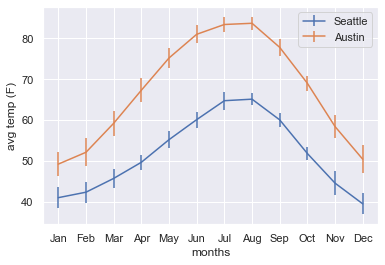

In [21]:
# adding error bars to plots
fig, ax = plt.subplots()
ax.errorbar(MONTHS, seattle_monthly['MLY-TAVG-NORMAL'], yerr=seattle_monthly['MLY-TAVG-STDDEV'], label='Seattle')
ax.errorbar(MONTHS, austin_weather['MLY-TAVG-NORMAL'], yerr=austin_weather['MLY-TAVG-STDDEV'], label='Austin')
ax.set_xlabel('months')
ax.set_ylabel('avg temp (F)')
ax.legend(loc=1)
plt.show()

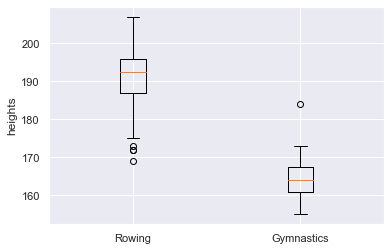

In [22]:
# adding boxplots
fig, ax = plt.subplots()
ax.boxplot([men_rowing['Height'], men_gymnastics['Height']])
ax.set_xticklabels(['Rowing', 'Gymnastics'])
ax.set_ylabel('heights')
plt.show()

**Scatter Plots**

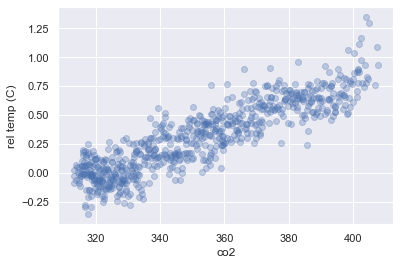

In [23]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'], alpha=0.3)
ax.set_xlabel('co2')
ax.set_ylabel('rel temp (C)')
plt.show() 

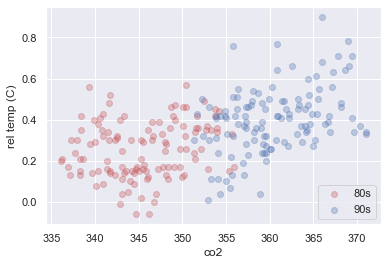

In [24]:
# customizing scatter plots
eighties = climate_change['1980-01-01':'1989-12-31']
nineties = climate_change['1990-01-01':'1999-12-31']

fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='r', label='80s', alpha=0.3)
ax.scatter(nineties['co2'], nineties['relative_temp'], color='b', label='90s', alpha=0.3)
ax.set_xlabel('co2')
ax.set_ylabel('rel temp (C)')
ax.legend(loc=4)
plt.show()

**Colorcoding by column**

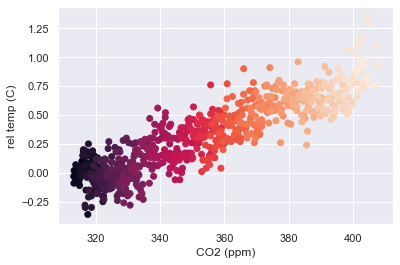

In [25]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'],
           c=climate_change.index)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel('rel temp (C)')
plt.show()

## Sharing Visualizations <a class="anchor" id="share"/>

- Preparing plots to share with others
- Saving visualizations
- Automating figures

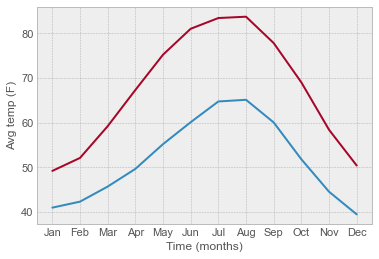

In [28]:
# changing plot style
plt.style.use('bmh')

fig, ax = plt.subplots()
ax.plot(MONTHS, seattle_monthly['MLY-TAVG-NORMAL'])
ax.plot(MONTHS, austin_weather['MLY-TAVG-NORMAL'])
ax.set_xlabel('Time (months)')
ax.set_ylabel('Avg temp (F)')
plt.show()

# back to default
# plt.style.use('default')

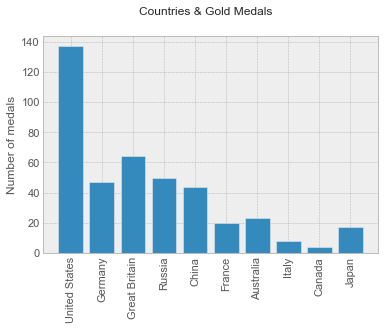

In [31]:
# saving the visualization
fig, ax = plt.subplots()
fig.suptitle('Countries & Gold Medals')
ax.bar(olympic_medals.index, olympic_medals['Gold'])
ax.set_xticklabels(olympic_medals.index, rotation=90)
ax.set_ylabel('Number of medals')
fig.savefig('gold_medals.png')

**Different File Formats**
- png = produces lossless compression of the image
- jpg = produces lossy compression, and can be used to create figures that take up less diskspace and less bandwidth
- svg = produces a vector graphics file where different elements can be edited in detail by advanced graphics software, such as Gimp or Adobe Illustrator

It's possible to do the following as well:
```
fig.savefig(path, quality=50)
```
Quality should be in the range [1, 100], where quality > 95 is ineffective in terms of compression.


It's also possible to change the resolution (DPI=dots per inch). The higher this number, the more densely the image will be rendered, and the size will increase exponentially:
```
fig.savefig(path, dpi=X)
```

One last thing is to change the size of the figure which can be done by two ways:
```
# first option
fig, ax = plt.subplots(figsize=(x, y))

# second option
fig.set_size_inches([x, y])
```



#### Automating figures 
Advantages: 
- ease & speed
- flexibility
- robustness
- reproducibility


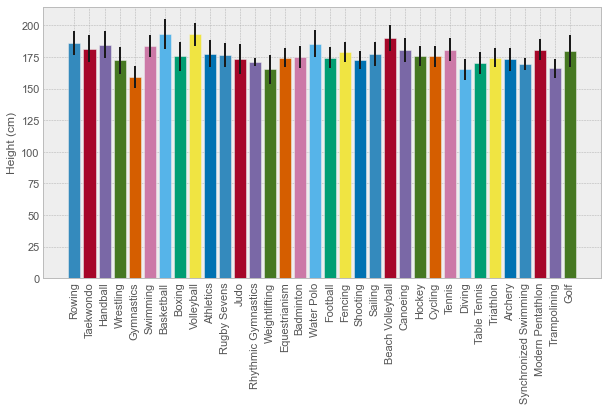

In [38]:
sports = athletes['Sport'].unique()
fig, ax = plt.subplots(figsize=(10, 5))

for sport in sports:
    sport_df = athletes[athletes['Sport'] == sport]
    ax.bar(sport, sport_df['Height'].mean(), yerr=sport_df['Height'].std())

ax.set_ylabel('Height (cm)')
ax.set_xticklabels(sports, rotation=90)
plt.show()